In [18]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import pandas as pd
pio.templates.default = "plotly_white"
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('user segmentation.csv')
print(data.head())

   userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                   17                         634            1   
1    1002                    0                          54            0   
2    1003                   37                         207            0   
3    1004                   32                         445            1   
4    1005                   45                         427            1   

   Ratings  New Password Request  Last Visited Minutes       Status  
0        9                     7                  2990    Installed  
1        4                     8                 24008  Uninstalled  
2        8                     5                   971    Installed  
3        6                     2                   799    Installed  
4        5                     6                  3668    Installed  


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   userid                      999 non-null    int64 
 1   Average Screen Time         999 non-null    int64 
 2   Average Spent on App (INR)  999 non-null    int64 
 3   Left Review                 999 non-null    int64 
 4   Ratings                     999 non-null    int64 
 5   New Password Request        999 non-null    int64 
 6   Last Visited Minutes        999 non-null    int64 
 7   Status                      999 non-null    object
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


In [8]:
## Data Cleaning
data.isnull().sum()

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [9]:
## How many types of diffenent valies in each column
unique_values = data.nunique()
print(unique_values)

userid                        999
Average Screen Time            51
Average Spent on App (INR)    606
Left Review                     2
Ratings                        11
New Password Request           15
Last Visited Minutes          938
Status                          2
dtype: int64


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,999.0,1500.000000,288.530761,1001.0,1250.5,1500.0,1749.5,1999.0
Average Screen Time,999.0,24.390390,14.235415,0.0,12.0,24.0,36.0,50.0
Average Spent on App (INR),999.0,424.415415,312.365695,0.0,96.0,394.0,717.5,998.0
Left Review,999.0,0.497497,0.500244,0.0,0.0,0.0,1.0,1.0
Ratings,999.0,6.513514,2.701511,0.0,5.0,7.0,9.0,10.0
New Password Request,999.0,4.941942,2.784626,1.0,3.0,5.0,7.0,15.0
Last Visited Minutes,999.0,5110.898899,8592.036516,201.0,1495.5,2865.0,4198.0,49715.0


In [13]:
## The highest, lowest, and average screen time of all the users

print(f'Average Screen Time = {data["Average Screen Time"].mean()}')
print(f'Highest Screen Time = {data["Average Screen Time"].max()}')
print(f'Lowest Screen Time = {data["Average Screen Time"].min()}')

Average Screen Time = 24.39039039039039
Highest Screen Time = 50
Lowest Screen Time = 0


In [12]:
## The highest, lowest, and average amount spent of all the users
print(f'Average Amount Spent = {data["Average Spent on App (INR)"].mean()}')
print(f'Highest Amount Spent = {data["Average Spent on App (INR)"].max()}')
print(f'Lowest Amount Spent = {data["Average Spent on App (INR)"].min()}')

Average Amount Spent = 424.4154154154154
Highest Amount Spent = 998
Lowest Amount Spent = 0


In [28]:
## The relationship between the spending capacity and screen time of the active users and the users who have uninstalled the app

figure = px.scatter(data_frame = data, 
                    x="Average Screen Time",
                    y="Average Spent on App (INR)", 
                    size="Average Spent on App (INR)", 
                    color= "Status",
                    title = "Relationship Between Spending Capacity and Screentime",
                    trendline="ols")
figure.show()

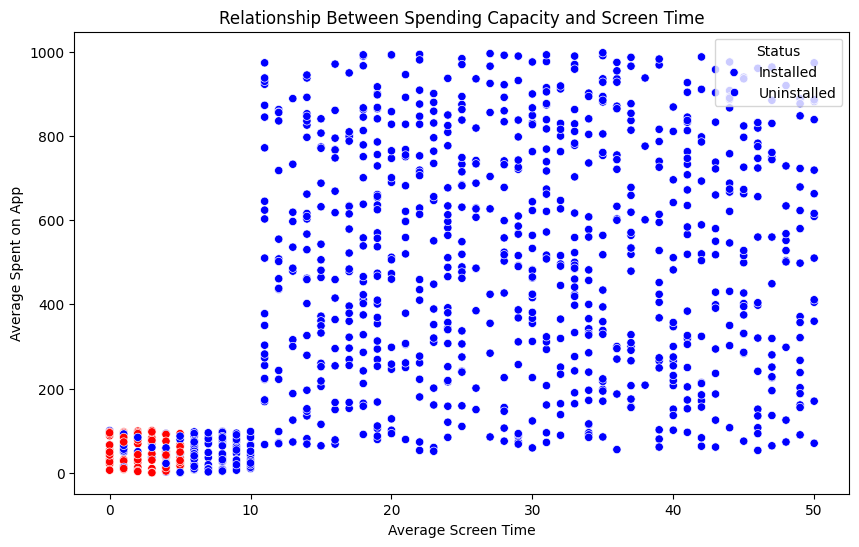

In [26]:

# Create the scatter plot with labels and legend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', hue='Status', data=data, palette={'Installed': 'blue', 'Uninstalled': 'red'})

# Set labels and title
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App')
plt.title('Relationship Between Spending Capacity and Screen Time')

# Customize the legend
plt.legend(title='Status', loc='upper right', labels=['Installed', 'Uninstalled'])

# Show the plot
plt.show()



Users who removed the application typically had an average daily screen time of less than 5 minutes and spent less than 100. Moreover, a linear correlation is observed between the average screen time and the spending habits of users who retained the application.

In [29]:
## The relationship between the ratings given by users and the average screen time

figure = px.scatter(data_frame = data, 
                    x="Average Screen Time",
                    y="Ratings", 
                    size="Ratings", 
                    color= "Status", 
                    title = "Relationship Between Ratings and Screentime",
                    trendline="ols")
figure.show()